# Analisi testuale dei discorsi del presidente dal 1949 ad oggi

In [74]:
# Anzitutto le librerie
import pandas as pd
import os

In [75]:
# Leggo l'elenco di tutti i discorsi suddivisi per anno
elenco_discorsi = pd.read_csv('elenco_discorsi.csv', encoding='utf-8')

# Nel 1948 non ci fu nessun discorso da parte di Enrico De Nicola. Pertanto tolgo la riga
elenco_discorsi = elenco_discorsi[elenco_discorsi['URL'] != 'NAP']

# Lunghezza dei discorsi
Come primo esercizio diamo un'occhiata al numero di parole dei discorsi di fine anno cercando di identificare un trend e vedere quali sono le differenti attitudini dei singoli Presidenti

In [76]:
# Primo passo: leggiamo i discorsi
contenuti_discorsi = []
percorso_discorsi = 'discorsi/'

for anno in elenco_discorsi['Anno']:
    # il path per aprire ciascun singolo file
    nome_file = f"{anno}.txt"
    percorso_file = os.path.join(percorso_discorsi, nome_file)
    
    # inseiriamo il discorso nella lista contenuti_discorsi
    if os.path.exists(percorso_file):
        with open(percorso_file, 'r', encoding='utf-8') as file:
            contenuti_discorsi.append(file.read())
    else:
        # Se il file non esiste
        contenuti_discorsi.append("File non trovato")

# Inserico il testo direttamente nel dataframe "elenco_discorsi" nella colonna Discorso
elenco_discorsi['Discorso'] = contenuti_discorsi

In [77]:
# Funzione per calcolare il numero di parole in un testo
def conta_parole(test):
    return len(test.split())

# Applicare la funzione e creo la colonna 'Discorso'
elenco_discorsi['Numero_parole'] = elenco_discorsi['Discorso'].apply(conta_parole)

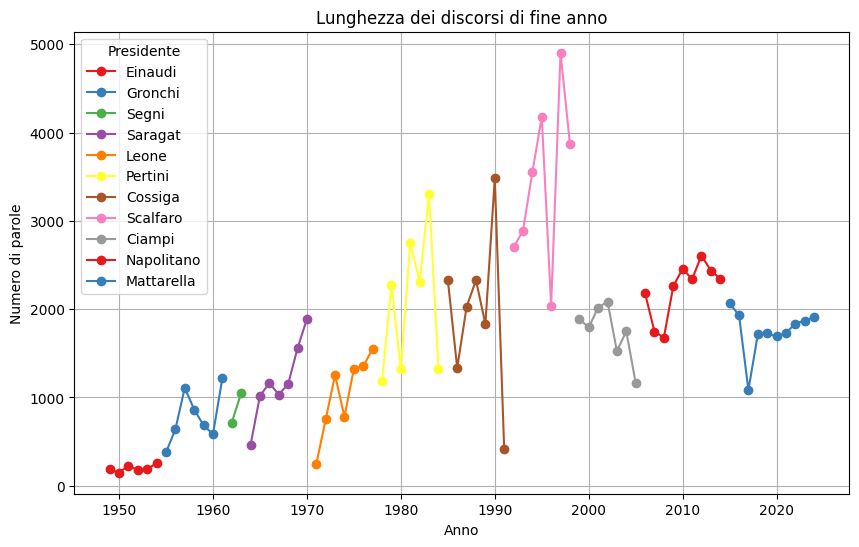

In [78]:
# Visualizziamo il trend temporale del numero di parole per ciascun discorso
# Usiamo la libreria seaborn per colorare i grafici in base al presidente
import matplotlib.pyplot as plt
import seaborn as sns

# Creare una lista di colori distinti (per ogni presidente)
presidenti_unici = elenco_discorsi['Cognome'].unique()
colori_presidenti = sns.color_palette("Set1", len(presidenti_unici))

# Creare un dizionario che mappa il cognome del presidente a un colore
mappa_colori = {presidente: colore for presidente, colore in zip(presidenti_unici, colori_presidenti)}

# Creare un grafico per ciascun presidente
plt.figure(figsize=(10, 6))

for presidente in presidenti_unici:
    # Filtriamo il DataFrame per ciascun presidente
    df_presidente = elenco_discorsi[elenco_discorsi['Cognome'] == presidente]
    
    # Tracciare la linea per questo presidente
    plt.plot(df_presidente['Anno'], df_presidente['Numero_parole'], marker='o', label=presidente, color=mappa_colori[presidente])

# Aggiungere etichette, titolo, e la legenda
plt.title('Lunghezza dei discorsi di fine anno')
plt.xlabel('Anno')
plt.ylabel('Numero di parole')
plt.legend(title='Presidente', loc='upper left')
plt.grid(True)

# Mostrare il grafico
plt.show()


In [79]:
# Creiamo qui un grafico interattivo con Plotly

import plotly.express as px

# Creare una mappa di colori per ciascun presidente
presidenti_unici = elenco_discorsi['Cognome'].unique()

# Conversione RGB in codici esadecimali
colori_presidenti = {presidente: '#%02x%02x%02x' % tuple(int(c * 255) for c in color)
                      for presidente, color in zip(presidenti_unici, sns.color_palette("Set1", len(presidenti_unici)))}

# Aggiungere il colore al DataFrame basato sul Presidente in formato esadecimale
elenco_discorsi['Colore_presidente'] = elenco_discorsi['Cognome'].map(colori_presidenti)

# Grafico interattivo con Plotly
fig = px.line(elenco_discorsi, x='Anno', y='Numero_parole', color='Cognome',
              title='Discorsi di fine anno del Presidente della Repubblica - numero di parole',
              labels={'Numero_parole': 'Numero di parole', 'Anno': 'Anno'},
              color_discrete_map=colori_presidenti)  # Use color_discrete_map
fig.show()

In [99]:
# Salvo il grafico come file HTML per pubblicarlo su infigures. Può essere utilizzato per condividere il grafico interattivo con altri
fig.write_html("output/dfa_num_parole.html")

# Parole più utilizzate

In [81]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Carico le stopword italiane
with open('stopwords-it.txt', 'r', encoding='utf-8') as f:
    stop_words = [line.strip() for line in f.readlines()]

# Tutti i discorsi insieme
testo_completo = ' '.join(elenco_discorsi['Discorso'])

# Inizializzo e applico il CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1, 1))
X = vectorizer.fit_transform([testo_completo])

parole_comuni = vectorizer.get_feature_names_out()

# La frequenza di ciascuna parola
frequenze = X.toarray().sum(axis=0)

# Dataframe con ciascuna parola e la relativa frequenza
df_parole = pd.DataFrame(list(zip(parole_comuni, frequenze)), columns=['Parola', 'Frequenza'])
df_parole = df_parole.sort_values(by='Frequenza', ascending=False)
df_parole.head(10)

,Parola,Frequenza
5813,italia,525
748,anno,453
7064,pace,295
4669,giovani,279
5816,italiani,242
7529,popolo,220
5906,lavoro,220
4108,europa,207
5991,libertà,206
7502,politica,195


## Wordcloud

In [ ]:
#se necessario installare wordcloud
!pip install wordcloud

In [83]:
from wordcloud import WordCloud

In [84]:
# Dizionario con le parole e le frequenze da passare a wordcloud
parola_freq = dict(zip(df_parole['Parola'], df_parole['Frequenza']))

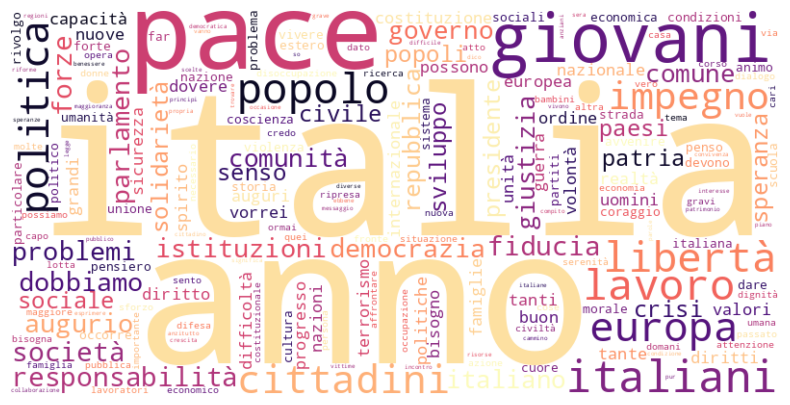

In [85]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate_from_frequencies(parola_freq)
# COLOR MAPS:
# "viridis": uno schema di colore che va dal giallo al viola.
# "plasma": uno schema di colore che va dal giallo all'arancione al viola.
# "inferno": una palette calda che va dal giallo al rosso al nero.
# "magma": una palette che va dal giallo al rosso scuro.
# "cividis": uno schema visibile anche da chi ha daltonismo.

# Visualizzare la word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Disattiva gli assi
plt.show()

# Andamento Parole chiave nel tempo

In [86]:
# Decidere con cura le parole di interesse
parole_interesse = ["Italia", "pace", "giovani", "lavoro"]

In [87]:
# Inizializza una lista vuota per contenere i dati delle occorrenze relative
dati_occorrenze_relative = []

for anno in elenco_discorsi['Anno']:
    discorso = elenco_discorsi[elenco_discorsi['Anno'] == anno]['Discorso'].values[0]
    numero_parole = len(discorso.split())
    occorrenze_relative = {'Anno': anno}
    
    # Conta le occorrenze relative di ciascuna parola di interesse nel discorso
    for parola in parole_interesse:
        # Conta quante volte la parola appare nel discorso
        occorrenze_assolute = discorso.lower().count(parola.lower())
        
        # Calcola la frequenza relativa della parola
        frequenza_relativa = occorrenze_assolute / numero_parole
        occorrenze_relative[parola] = frequenza_relativa
    
    # Aggiungi il dizionario con le occorrenze relative alla lista
    dati_occorrenze_relative.append(occorrenze_relative)

# DataFrame delle occorrenze relative
df_occorrenze_relative = pd.DataFrame(dati_occorrenze_relative)

# Impostiamo l'anno come indice
df_occorrenze_relative.set_index('Anno', inplace=True)

In [88]:
df_occorrenze_relative

,Italia,pace,giovani,lavoro
Anno,,,,
1949,0.010695,0.005348,0.000000,0.000000
1950,0.013514,0.006757,0.000000,0.006757
1951,0.013158,0.000000,0.000000,0.004386
1952,0.016949,0.000000,0.000000,0.000000
1953,0.010638,0.000000,0.000000,0.000000
...,...,...,...,...
2020,0.006505,0.000591,0.001774,0.001183
2021,0.006932,0.001155,0.006355,0.001733
2022,0.004353,0.001632,0.003264,0.001632


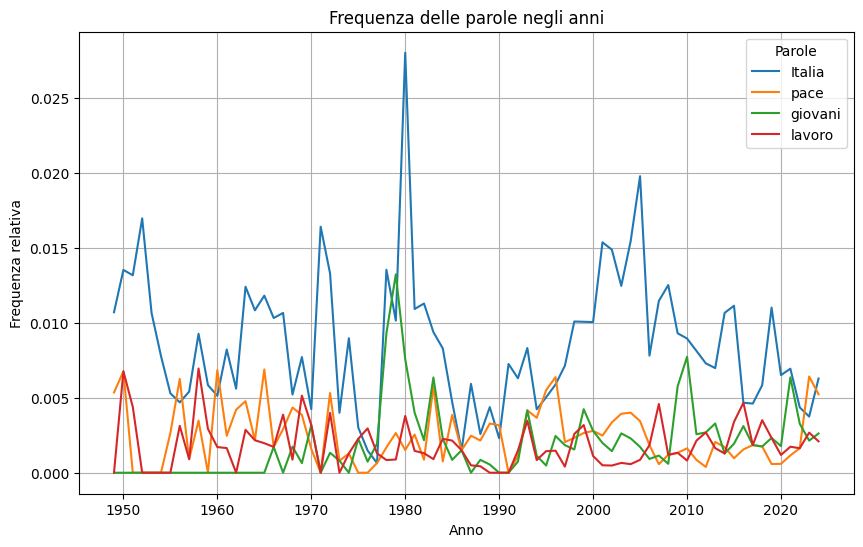

In [89]:
# Grafico a linee per ciascuna parola
plt.figure(figsize=(10, 6))

for parola in parole_interesse:
    plt.plot(df_occorrenze_relative.index, df_occorrenze_relative[parola], label=parola)

plt.title('Frequenza delle parole negli anni')
plt.xlabel('Anno')
plt.ylabel('Frequenza relativa')
plt.legend(title='Parole')

plt.grid(True)
plt.show()

In [95]:
# Aggiungere il presidente al DataFrame delle occorrenze relative
df_occorrenze_relative['Presidente'] = elenco_discorsi.set_index('Anno')['Presidente']

# Verticalizziamo il DataFrame per darlo in pasto a Plotly
df_long = df_occorrenze_relative.reset_index().melt(id_vars=["Anno", "Presidente"], 
                                                    value_vars=parole_interesse, 
                                                    var_name="Parola", 
                                                    value_name="Frequenza relativa")
df_long

,Anno,Presidente,Parola,Frequenza relativa
0,1949,Luigi Einaudi,Italia,0.010695
1,1950,Luigi Einaudi,Italia,0.013514
2,1951,Luigi Einaudi,Italia,0.013158
3,1952,Luigi Einaudi,Italia,0.016949
4,1953,Luigi Einaudi,Italia,0.010638
...,...,...,...,...
299,2020,Sergio Mattarella,lavoro,0.001183
300,2021,Sergio Mattarella,lavoro,0.001733
301,2022,Sergio Mattarella,lavoro,0.001632
302,2023,Sergio Mattarella,lavoro,0.002672


In [ ]:
import plotly.express as px

# Crea il grafico interattivo con Plotly
fig = px.line(df_long, x="Anno", 
              y="Frequenza relativa", 
              color="Parola", 
              title="Frequenza relativa delle parole nel tempo",
              labels={"Anno": "Anno", "Frequenza relativa": "Frequenza relativa", "Parola": "Parola"},
              hover_data={"Anno": True, "Parola": True, "Frequenza relativa": True, "Presidente": True})

# Personalizzare il popup (hovertemplate)
fig.update_traces(
    hovertemplate=
    'Presidente: %{customdata[1]}<br>' +  # Mostra il presidente
    'Frequenza relativa: %{y:.10f}' +  # Mostra la frequenza relativa con 10 cifre decimali
    '<extra></extra>',  # Rimuove la parte extra del tooltip (di default)
    text=df_long['Parola'],  # Collega la parola al testo del tooltip
    customdata=df_long[['Anno', 'Presidente']]  # Aggiungi i dati personalizzati per ogni traccia
)

# Mostriamo il grafico
fig.update_layout(
    hovermode='x unified',  # Mostra i dati quando passi sopra un punto
    xaxis_title='Anno',
    yaxis_title='Frequenza relativa',
    title='Frequenza relativa delle parole nel tempo'
)

fig.show()